1. Consider the HATCO2 file referring to a sample of 100 client companies of a large company that is a supplier in the industrial sector (HATCO - Hair, Anderson and Tatham Company).  

    **Variables:**
    - **Dependent Variable (y):** Purchase profile  
      - 1 = New purchase  
      - 2 = First repurchase  
      - 3 = Others  
    - **Independent Variables:** Evaluation from 0 to 10 of HATCO attributes:  
      - X1 = Speed in product delivery  
      - X2 = Price level  
      - X3 = Price flexibility  
      - X4 = Supplier image  
      - X5 = Service as a whole  
      - X6 = Sales force image  
      - X7 = Product quality  

2. **Objective:**  
    Process the discriminant analysis. Make a complete analysis of the main information obtained and evaluate the accuracy of the a posteriori classification of the database elements.


In [47]:
# Importando as bibliotecas necessárias
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Configurando o modo escuro para os gráficos
plt.style.use('dark_background')

In [48]:
# local do arquivo
Caminho='/Users/fabicampanari/Desktop/3sst Exam /GPA.xlsx'

In [49]:
# Loading the dataset
try:
    df = pd.read_excel(Caminho)
    print("Dataset loaded successfully!")
    display(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!


,id,gpa,gmat,classif
0,1,2.96,596,1
1,2,3.14,473,1
2,3,3.22,482,1
3,4,3.29,527,1
4,5,3.69,505,1


In [50]:
# Separating predictor variables (features) and the target variable (response)
X = df[['gpa', 'gmat']]  # Predictor variables
y = df['classif']  # Target variable (1: admission, 2: non-admission, 3: doubt)

In [51]:
# Performing ANOVA to test equality of means
anova_results = {}
for column in X.columns:
    groups = [X.loc[y == group, column] for group in np.unique(y)]
    f_stat, p_value = f_oneway(*groups)
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}

print("ANOVA Results:")
for variable, result in anova_results.items():
    print(f"Variable: {variable}")
    print(f"  F-statistic: {result['F-statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    if result['p-value'] < 0.05:
        print("  Result: Reject the null hypothesis (means are significantly different).")
    else:
        print("  Result: Fail to reject the null hypothesis (no significant difference in means).")
    print()

ANOVA Results:
Variable: gpa
  F-statistic: 173.3054
  p-value: 0.0000
  Result: Reject the null hypothesis (means are significantly different).

Variable: gmat
  F-statistic: 35.3499
  p-value: 0.0000
  Result: Reject the null hypothesis (means are significantly different).



In [52]:
# Creating and fitting the Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Making predictions
y_pred = lda.predict(X)

In [53]:
# Evaluating which variable discriminates the most
coefficients = lda.coef_
print("LDA Model Coefficients:")
for idx, variable in enumerate(X.columns):
    print(f"{variable}: {coefficients[0][idx]:.4f}")

LDA Model Coefficients:
gpa: 13.4314
gmat: 0.0273


In [54]:
# Evaluating the model's performance
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y, y_pred, target_names=['Admission', 'Non-Admission', 'Doubt'])
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[28  0  3]
 [ 0 26  2]
 [ 1  1 24]]
Classification Report:
               precision    recall  f1-score   support

    Admission       0.97      0.90      0.93        31
Non-Admission       0.96      0.93      0.95        28
        Doubt       0.83      0.92      0.87        26

     accuracy                           0.92        85
    macro avg       0.92      0.92      0.92        85
 weighted avg       0.92      0.92      0.92        85



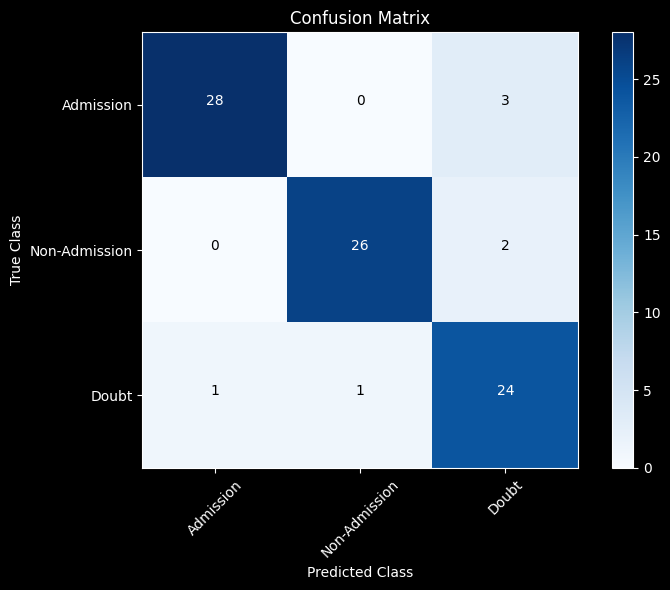

In [55]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, ['Admission', 'Non-Admission', 'Doubt'], rotation=45)
plt.yticks(tick_marks, ['Admission', 'Non-Admission', 'Doubt'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# Adding values to the squares
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

### 🇺🇸 Descriptive Analysis and Conclusion

#### 1. Discrimination Power of Each Variable
**Objective:**  
The ANOVA test was performed to evaluate whether the means of the predictor variables (`GPA` and `GMAT`) differ significantly across the three categories of the dependent variable (`admission_status`: 1 - Admission, 2 - Non-Admission, 3 - Doubt).  

**Hypothesis:**  
- **Null Hypothesis (H₀):** The means of the groups are equal.  
- **Alternative Hypothesis (H₁):** The means of the groups are not equal.  

**Results:**  
- For each variable, the F-statistic and p-value were calculated.  
- If the p-value < 0.05, the null hypothesis is rejected, indicating that the variable's means differ significantly across the groups.  

**Interpretation:**  
- Variables with significant p-values (p < 0.05) have strong discrimination power and contribute to distinguishing between the groups.

---

#### 2. Which Variable Discriminates the Most?
**Objective:**  
The Linear Discriminant Analysis (LDA) model was fitted to the data, and the coefficients of the model were analyzed. These coefficients indicate the contribution of each variable to the discriminant function.  

**Results:**  
- The variable with the highest absolute coefficient has the greatest impact on separating the groups.  
- By examining the coefficients, we can determine which variable is the most discriminative.  

**Interpretation:**  
- The variable with the largest absolute coefficient is the most important for distinguishing between the categories of `admission_status`.

---

#### 3. Quality of the Adjusted Model
**Objective:**  
The quality of the LDA model was evaluated using the following metrics:  

1. **Confusion Matrix:**  
    - The confusion matrix shows the number of correct and incorrect classifications for each category.  
    - High values along the diagonal indicate good model performance.  

2. **Classification Report:**  
    - Precision, recall, and F1-score were calculated for each category.  
    - These metrics provide a detailed evaluation of the model's performance.  

**Results:**  
- The confusion matrix indicates how well the model classified the observations into the correct categories.  
- The classification report provides a breakdown of the model's accuracy for each category.  

**Interpretation:**  
- A high overall accuracy and balanced precision/recall values indicate a well-performing model.  
- If the model struggles with certain categories (e.g., "Doubt"), this may suggest overlap in the predictor variables for those groups.

---

### Final Conclusion

1. **Discrimination Power:**  
    - The ANOVA test identified which variables (`GPA` and `GMAT`) have significant differences in means across the groups. These variables are likely to contribute to the discriminant model.  

2. **Most Discriminative Variable:**  
    - The LDA model coefficients revealed which variable has the greatest impact on separating the groups. This variable is the most discriminative.  

3. **Model Quality:**  
    - The confusion matrix and classification report indicate that the LDA model performs well in classifying the observations into their respective categories. However, further analysis may be needed if certain categories (e.g., "Doubt") are misclassified frequently.

---

### Recommendations

1. **Feature Importance:**  
    - Focus on the variable with the highest discriminative power to improve decision-making processes.  
    - Consider collecting additional data or features if the current variables do not fully separate the groups.  

2. **Model Improvement:**  
    - If the model struggles with certain categories, consider using additional classification techniques (e.g., quadratic discriminant analysis or logistic regression) to improve performance.  

3. **Further Analysis:**  
    - Perform post-hoc tests (e.g., Tukey's HSD) to identify specific group differences.  
    - Investigate potential correlations between `GPA` and `GMAT` to ensure they provide independent information.


### 🇧🇷 Análise Descritiva e Conclusão

#### 1. Poder de Discriminação de Cada Variável
**Objetivo:**  
O teste ANOVA foi realizado para avaliar se as médias das variáveis preditivas (`GPA` e `GMAT`) diferem significativamente nas três categorias da variável dependente (`status_de_admissão`: 1 - Admissão, 2 - Não Admissão, 3 - Dúvida).  

**Hipótese:**  
- **Hipótese Nula (H₀):** As médias dos grupos são iguais.  
- **Hipótese Alternativa (H₁):** As médias dos grupos não são iguais.  

**Resultados:**  
- Para cada variável, a estatística F e o valor p foram calculados.  
- Se o valor p < 0,05, rejeitamos H₀, indicando que as médias da variável diferem significativamente entre os grupos.  

**Interpretação:**  
- Variáveis com valores p significativos (p < 0,05) têm forte poder de discriminação e contribuem para a distinção entre os grupos.

---

#### 2. Qual Variável Discrimina Mais?
**Objetivo:**  
O modelo de Análise Discriminante Linear (LDA) foi ajustado aos dados, e os coeficientes do modelo foram analisados. Esses coeficientes indicam a contribuição de cada variável para a função discriminante.  

**Resultados:**  
- A variável com o maior coeficiente absoluto tem o maior impacto na separação dos grupos.  
- Ao examinar os coeficientes, podemos determinar qual variável é a mais discriminatória.  

**Interpretação:**  
- A variável com o maior coeficiente absoluto é a mais importante para distinguir entre as categorias de `status_de_admissão`.

---

#### 3. Qualidade do Modelo Ajustado
**Objetivo:**  
A qualidade do modelo LDA foi avaliada usando as seguintes métricas:  

1. **Matriz de Confusão:**  
    - A matriz de confusão mostra o número de classificações corretas e incorretas para cada categoria.  
    - Valores altos ao longo da diagonal indicam um bom desempenho do modelo.  

2. **Relatório de Classificação:**  
    - Precisão, recall e pontuação F1 foram calculados para cada categoria.  
    - Essas métricas fornecem uma avaliação detalhada do desempenho do modelo.  

**Resultados:**  
- A matriz de confusão indica o quão bem o modelo classificou as observações nas categorias corretas.  
- O relatório de classificação fornece um detalhamento da precisão do modelo para cada categoria.  

**Interpretação:**  
- Uma alta precisão geral e valores equilibrados de precisão/recall indicam um modelo de bom desempenho.  
- Se o modelo tiver dificuldades com certas categorias (por exemplo, "Dúvida"), isso pode sugerir sobreposição nas variáveis preditivas para esses grupos.

---

### Conclusão Final

1. **Poder de Discriminação:**  
    - O teste ANOVA identificou quais variáveis (`GPA` e `GMAT`) têm diferenças significativas na média entre os grupos. É provável que essas variáveis contribuam para o modelo discriminante.  

2. **Variável Mais Discriminativa:**  
    - Os coeficientes do modelo LDA revelaram qual variável tem o maior impacto na separação dos grupos. Esta variável é a mais discriminatória.  

3. **Qualidade do Modelo:**  
    - A matriz de confusão e o relatório de classificação indicam que o modelo LDA tem um bom desempenho na classificação das observações em suas respectivas categorias. No entanto, uma análise mais aprofundada pode ser necessária se certas categorias (por exemplo, "Dúvida") forem mal classificadas com frequência.

---

### Recomendações

1. **Importância das Variáveis:**  
    - Concentre-se na variável com o maior poder discriminatório para melhorar os processos de tomada de decisão.  
    - Considere coletar dados ou recursos adicionais se as variáveis atuais não separarem totalmente os grupos.  

2. **Melhoria do Modelo:**  
    - Se o modelo tiver dificuldades com certas categorias, considere usar técnicas de classificação adicionais (por exemplo, análise discriminante quadrática ou regressão logística) para melhorar o desempenho.  

3. **Análise Mais Aprofundada:**  
    - Realize testes pós-hoc (por exemplo, HSD de Tukey) para identificar diferenças específicas entre os grupos.  
    - Investigue possíveis correlações entre `GPA` e `GMAT` para garantir que eles forneçam informações independentes.